In [ ]:
# notebook for general testing

In [34]:
from sklearn.model_selection import cross_validate, LeaveOneGroupOut
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import networkx as nx
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.append("..")
sys.path.append("../d2c/")
from utils import print_dag, dag_to_formula, show_dag

with open('../data/esempio_pre.pkl', 'rb') as f:
    observations, dags, updated_dags = pickle.load(f)

In [35]:
idx = 2

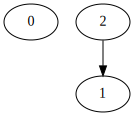

In [36]:
show_dag(dags[idx], weight=False)

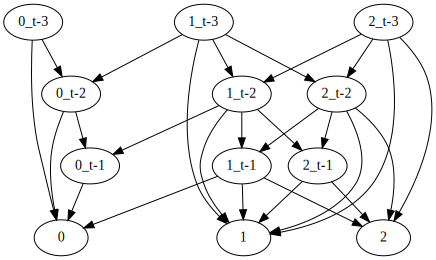

In [37]:
show_dag(updated_dags[idx], weight=False)

In [31]:
with open('../data/esempio_post.pkl', 'rb') as f:
    observations, dags, updated_dags = pickle.load(f)

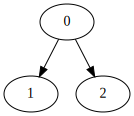

In [32]:
show_dag(dags[idx], weight=False)

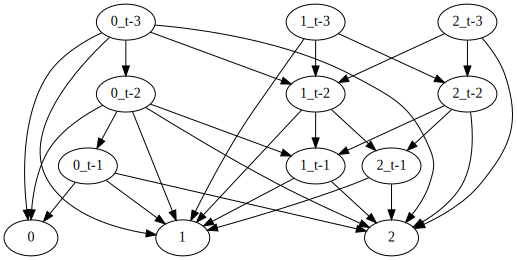

In [33]:
show_dag(updated_dags[idx], weight=False)

In [41]:
from sklearn.model_selection import cross_validate, LeaveOneGroupOut
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import networkx as nx

import sys
sys.path.append("..")
sys.path.append("../d2c/")
from utils import print_dag, dag_to_formula, show_dag

import pickle

#suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score



In [42]:
# df = pd.read_csv('../data/ts3_descriptors_with_cycles.csv')  # replace with your data file
df = pd.read_csv('../data/ts5_descriptors_with_cycles.csv')  # replace with your data file
# df = pd.read_csv('../data/ts_limited_descriptors.csv')  # replace with your data file



In [43]:
df = df.drop_duplicates(subset=['graph_id', 'edge_source', 'edge_dest'], keep='first').reset_index(drop=True)

In [44]:
df.to_csv('../data/ts5_fixed_descriptors_with_cycles.csv', index=False)

In [45]:
graph_info = df[['graph_id','edge_source','edge_dest']]
X = df.drop(columns=['graph_id','edge_source','edge_dest', 'is_causal'])
y = df['is_causal']

In [46]:
#data stats
print('Number of samples:', len(X))
print('Number of features:', len(X.columns))
print('Number of causal edges:', y.sum())
print('Number of non-causal edges:', len(y) - y.sum())
print('Number of graphs:', len(df['graph_id'].unique()))


Number of samples: 45000
Number of features: 92
Number of causal edges: 7506
Number of non-causal edges: 37494
Number of graphs: 1500


In [47]:
X

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature82,Feature83,Feature84,Feature85,Feature86,Feature87,Feature88,Feature89,Feature90,Feature91
0,0.067796,-0.278205,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,6,0.039735,74.614333,54.953306,8.021390,-6.115111,1.610458,2.093956,6.924163,29.032334
1,0.295755,0.491573,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,6,0.039735,74.614333,47.240373,8.021390,3.299974,6.012510,5.909580,48.113067,63.583511
2,-1.349899,-0.639216,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,6,0.039735,68.182631,74.614333,-1.307289,8.021390,-5.958614,4.944538,-64.568580,-54.991321
3,-1.242661,-0.821586,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,6,0.039735,68.182631,54.953306,-1.307289,-6.115111,3.631621,-1.655760,-47.200093,-52.719084
4,-0.228380,-0.228380,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,6,0.039735,68.182631,71.318126,-1.307289,8.148340,-3.230397,8.093250,-39.795642,-23.885010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.186399,-0.140454,0.027863,0.000126,0.000041,0.00000,0.00000,0.00000,0.00000,0.00000,...,6,0.039474,28.719160,23.782017,2.566904,0.261256,2.081316,0.140297,2.256394,-5.944817
44996,-0.129243,0.022077,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,6,0.039474,36.426137,25.202182,-3.535397,2.978243,1.302877,1.697962,7.858334,2.893543
44997,0.254317,0.217834,0.060171,0.060171,0.024847,0.01921,0.01921,0.01921,0.01921,0.01921,...,6,0.039474,36.426137,36.455159,-3.535397,-5.574772,-2.869700,-5.365685,21.306027,26.227298
44998,-0.063341,-0.104350,0.057916,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,6,0.039474,36.426137,23.782017,-3.535397,0.261256,-0.459624,1.196496,-11.115187,0.494992


In [48]:
with open('../data/ts5.pkl', 'rb') as f:
    observations, dags, updated_dags = pickle.load(f)

With Naive

In [49]:

#train test split 
logo = LeaveOneGroupOut()
groups = df['graph_id']
brf_scores = pd.DataFrame(columns=['accuracy_train','precision_train','recall_train', 'f1_train', 'auc_train', 'accuracy_test', 'precision_test', 'recall_test', 'f1_test', 'auc_test', 'accuracy_naive', 'precision_naive', 'recall_naive', 'f1_naive', 'auc_naive', 'accuracy_random', 'precision_random', 'recall_random','f1_random', 'auc_random'])
counter = 0
predicted_values = {}
predicted_probabilities = {}
real_values = {}
for train_index, test_index in logo.split(X, y, groups):
    current_group = groups[test_index[0]]
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    brf = BalancedRandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, n_jobs=-1)
    brf.fit(X_train, y_train)



    accuracy_train = brf.score(X_train, y_train)
    precision_train = precision_score(y_train, brf.predict(X_train))
    recall_train = recall_score(y_train, brf.predict(X_train))
    f1_train = f1_score(y_train, brf.predict(X_train))
    auc_train = roc_auc_score(y_train, brf.predict_proba(X_train)[:,1])

    predicted_probs = brf.predict_proba(X_test)[:,1]
    threshold = 0.8  # for example
    predicted_labels = (predicted_probs > threshold).astype(int)

    # accuracy_test = brf.score(X_test, y_test)
    # precision_test = precision_score(y_test, brf.predict(X_test))
    # recall_test = recall_score(y_test, brf.predict(X_test))
    # f1_test = f1_score(y_test, brf.predict(X_test))
    # auc_test = roc_auc_score(y_test, brf.predict_proba(X_test)[:,1])

    accuracy_test = brf.score(X_test, y_test)
    precision_test = precision_score(y_test, predicted_labels)
    recall_test = recall_score(y_test, predicted_labels)
    f1_test = f1_score(y_test, predicted_labels)
    auc_test = roc_auc_score(y_test, brf.predict_proba(X_test)[:,1])

    naive_predictions = np.zeros(len(y_test))
    accuracy_naive = np.mean(naive_predictions == y_test)
    precision_naive = precision_score(y_test, naive_predictions, zero_division=0)
    recall_naive = recall_score(y_test, naive_predictions)
    f1_naive = f1_score(y_test, naive_predictions)
    auc_naive = roc_auc_score(y_test, naive_predictions)

    random_predictions = np.random.randint(0,2,len(y_test))
    accuracy_random = np.mean(random_predictions == y_test)
    precision_random = precision_score(y_test, random_predictions)
    recall_random = recall_score(y_test, random_predictions)
    f1_random = f1_score(y_test, random_predictions)
    auc_random = roc_auc_score(y_test, random_predictions)

    

    predicted_values[len(brf_scores)] = brf.predict(X_test)
    predicted_probabilities[len(brf_scores)] = brf.predict_proba(X_test)[:,1]
    real_values[len(brf_scores)] = y_test

    brf_scores.loc[len(brf_scores)] = [accuracy_train, precision_train, recall_train, f1_train, auc_train, accuracy_test, precision_test, recall_test, f1_test, auc_test, accuracy_naive, precision_naive, recall_naive, f1_naive, auc_naive, accuracy_random, precision_random, recall_random, f1_random, auc_random]


    counter += 1
    if counter == 20:
        break

c:\ProgramData\Anaconda3\envs\d2c\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
print(brf_scores[['precision_train', 'recall_train', 'f1_train',
       'auc_train', 'precision_test', 'recall_test',
       'f1_test', 'auc_test']].round(2).to_latex())


\begin{tabular}{lrrrrrrrr}
\toprule
{} &  precision\_train &  recall\_train &  f1\_train &  auc\_train &  precision\_test &  recall\_test &  f1\_test &  auc\_test \\
\midrule
0  &             0.43 &           1.0 &       0.6 &       0.95 &            1.00 &         1.00 &     1.00 &      1.00 \\
1  &             0.43 &           1.0 &       0.6 &       0.95 &            0.60 &         1.00 &     0.75 &      0.98 \\
2  &             0.43 &           1.0 &       0.6 &       0.95 &            1.00 &         0.78 &     0.88 &      0.94 \\
3  &             0.43 &           1.0 &       0.6 &       0.95 &            0.75 &         0.75 &     0.75 &      0.98 \\
4  &             0.43 &           1.0 &       0.6 &       0.95 &            1.00 &         1.00 &     1.00 &      1.00 \\
5  &             0.43 &           1.0 &       0.6 &       0.95 &            0.83 &         0.83 &     0.83 &      0.97 \\
6  &             0.43 &           1.0 &       0.6 &       0.95 &            0.67 &         0.

In [68]:
brf_scores_old = pd.read_csv('ts5_brf_scores.csv')

In [74]:
pd.concat([brf_scores_old['precision_test'],brf_scores['precision_test'],brf_scores_old['recall_test'],brf_scores['recall_test'] ],axis=1)

,precision_test,precision_test,recall_test,recall_test
0,0.500000,1.000000,1.000000,1.000000
1,0.500000,1.000000,1.000000,1.000000
2,0.450000,0.875000,1.000000,0.777778
3,0.500000,0.750000,1.000000,0.750000
4,0.500000,1.000000,1.000000,1.000000
5,0.500000,0.833333,1.000000,0.833333
6,0.428571,0.666667,1.000000,0.666667
7,0.545455,0.833333,0.857143,0.714286
8,0.416667,0.833333,1.000000,1.000000
9,0.555556,0.500000,1.000000,0.600000


In [17]:
predicted_values

{0: array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 1: array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0], dtype=int64),
 2: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 1], dtype=int64),
 3: array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 0], dtype=int64),
 4: array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0], dtype=int64),
 5: array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 6: array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 0], dtype=int64),
 7: array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 8: arra

In [56]:
all_labels = np.concatenate([predicted_values[i] for i in predicted_values.keys()])
all_probs = np.concatenate([predicted_probabilities[i] for i in predicted_probabilities.keys()])

In [57]:
pre_postprocessing = pd.concat([graph_info, pd.DataFrame(all_labels, columns=['predicted_label']), pd.DataFrame(all_probs, columns=['predicted_probabilities'])], axis=1).head(600)

In [58]:
pre_postprocessing.to_csv('ts5_pre_postprocessing.csv', index=False)

In [59]:
pre_postprocessing.loc[pre_postprocessing.graph_id == 12]

,graph_id,edge_source,edge_dest,predicted_label,predicted_probabilities
360,12,0,1,1.0,0.703975
361,12,1,2,1.0,0.862202
362,12,3,0,1.0,0.773427
363,12,3,1,1.0,0.727642
364,12,4,0,1.0,0.717428
365,12,5,0,1.0,0.772018
366,12,5,2,1.0,0.862291
367,12,0,2,0.0,0.002504
368,12,0,3,1.0,0.615608
369,12,0,4,1.0,0.710519


In [60]:
# Reload the CSV file
data = pd.read_csv('ts5_pre_postprocessing.csv')

# Filter data to get only rows with predicted_label as 1
causal_edges = data[data['predicted_label'] == 1]

# Find pairs (i,j) and (j,i) both with label 1 and within the same graph_id
pairs = []
for _, row in causal_edges.iterrows():
    reverse_edge = causal_edges[
        (causal_edges['graph_id'] == row['graph_id']) & 
        (causal_edges['edge_source'] == row['edge_dest']) & 
        (causal_edges['edge_dest'] == row['edge_source'])
    ]
    
    if not reverse_edge.empty:
        pair = (row['graph_id'], row['edge_source'], row['edge_dest'])
        reverse_pair = (row['graph_id'], row['edge_dest'], row['edge_source'])
        
        # Avoid duplicate pairs
        if reverse_pair not in pairs:
            pairs.append(pair)

# Convert to DataFrame
identified_pairs_df = pd.DataFrame(pairs, columns=['graph_id', 'edge_source', 'edge_dest'])

identified_pairs_df.head()

# For each identified pair (i,j) and (j,i)
for _, row in identified_pairs_df.iterrows():
    # Extract the pairs' details
    graph_id, i, j = row['graph_id'], row['edge_source'], row['edge_dest']
    
    # Get the rows for (i,j) and (j,i)
    edge_ij = data[(data['graph_id'] == graph_id) & (data['edge_source'] == i) & (data['edge_dest'] == j)]
    edge_ji = data[(data['graph_id'] == graph_id) & (data['edge_source'] == j) & (data['edge_dest'] == i)]
    
    # Compare their probabilities and update the one with the lower probability
    if edge_ij.iloc[0]['predicted_probabilities'] < edge_ji.iloc[0]['predicted_probabilities']:
        data.at[edge_ij.index[0], 'predicted_label'] = 0
        data.at[edge_ij.index[0], 'predicted_probabilities'] = 0
    else:
        data.at[edge_ji.index[0], 'predicted_label'] = 0
        data.at[edge_ji.index[0], 'predicted_probabilities'] = 0

# Display the updated data
data.head()


,graph_id,edge_source,edge_dest,predicted_label,predicted_probabilities
0,0,1,2,1.0,0.907619
1,0,1,5,1.0,0.874365
2,0,0,1,0.0,0.000031
3,0,0,2,0.0,0.000031
4,0,0,3,0.0,0.000031


In [61]:
data['truth'] = y.head(600)
data['predicted_label_before'] = pd.read_csv('ts5_pre_postprocessing.csv')['predicted_label']
data['predicted_probabilities_before'] = pd.read_csv('ts5_pre_postprocessing.csv')['predicted_probabilities']

In [62]:
len(data.predicted_label_before)

600

In [63]:
(data.predicted_label == data.predicted_label_before).sum()

487

In [64]:
accuracy = np.mean(data['truth'] == data['predicted_label'])
precision = precision_score(data['truth'], data['predicted_label'])
recall = recall_score(data['truth'], data['predicted_label'])
f1 = f1_score(data['truth'], data['predicted_label'])
auc = roc_auc_score(data['truth'], data['predicted_probabilities'])

old_accuracy = np.mean(data['truth'] == data['predicted_label_before'])
old_precision = precision_score(data['truth'], data['predicted_label_before'])
old_recall = recall_score(data['truth'], data['predicted_label_before'])
old_f1 = f1_score(data['truth'], data['predicted_label_before'])
old_auc = roc_auc_score(data['truth'], data['predicted_probabilities_before'])

pd.DataFrame([[accuracy, precision, recall, f1, auc], [old_accuracy, old_precision, old_recall, old_f1, old_auc]], columns=['accuracy', 'precision', 'recall', 'f1', 'auc'], index=['after', 'before'])


,accuracy,precision,recall,f1,auc
after,0.908333,0.700000,0.815534,0.753363,0.830615
before,0.780000,0.437768,0.990291,0.607143,0.954758


In [65]:
predicted_values[12]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [66]:

#handle a single graph
graph_id = 9

info = data.loc[data['graph_id'] == graph_id]
pred_causes = info['predicted_label']
pred_probs = info['predicted_probabilities']
real_causes = info['truth']

In [67]:
info

,graph_id,edge_source,edge_dest,predicted_label,predicted_probabilities,truth,predicted_label_before,predicted_probabilities_before
270,9,0,4,1.0,0.941588,1,1.0,0.941588
271,9,0,5,1.0,0.887288,1,1.0,0.887288
272,9,1,3,0.0,0.000000,1,1.0,0.635467
273,9,2,1,0.0,0.000000,1,1.0,0.632589
274,9,3,5,1.0,0.858123,1,1.0,0.858123
275,9,0,1,0.0,0.048627,0,0.0,0.048627
276,9,0,2,0.0,0.003333,0,0.0,0.003333
277,9,0,3,1.0,0.837485,0,1.0,0.837485
278,9,1,0,0.0,0.021329,0,0.0,0.021329
279,9,1,2,1.0,0.882450,0,1.0,0.882450


In [68]:
info.to_csv('temp_results.csv')

In [69]:

results = pd.read_csv('temp_results.csv')

In [70]:


#construct dag from pred_causes
import sys
sys.path.append("..")
sys.path.append("../d2c/")
from utils import print_dag, dag_to_formula, show_dag
import numpy as np
import pandas as pd
import networkx as nx
G = nx.DiGraph()
G.add_nodes_from(np.unique(np.append(results.edge_source.unique(),results.edge_dest.unique())))

for value in results.iterrows():
    if value[1]['predicted_label'] == 1:
        G.add_edge(int(value[1]['edge_source']), int(value[1]['edge_dest']), color='blue', weight=value[1]['predicted_probabilities'])




In [71]:


#construct dag from pred_causes
import sys
sys.path.append("..")
sys.path.append("../d2c/")
from utils import print_dag, dag_to_formula, show_dag
import numpy as np
import pandas as pd
import networkx as nx
G2 = nx.DiGraph()
G2.add_nodes_from(np.unique(np.append(results.edge_source.unique(),results.edge_dest.unique())))

for value in results.iterrows():
    if value[1]['predicted_label_before'] == 1:
        G2.add_edge(int(value[1]['edge_source']), int(value[1]['edge_dest']), color='blue', weight=value[1]['predicted_probabilities_before'])




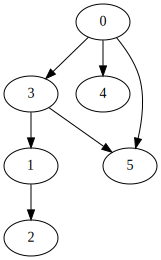

In [72]:

show_dag(G, weight=False)


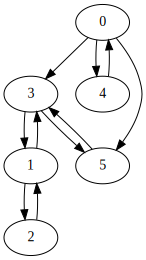

In [78]:

show_dag(G2, weight=False)


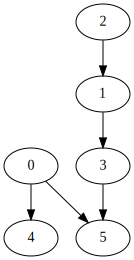

In [74]:
show_dag(dags[graph_id],weight=False)

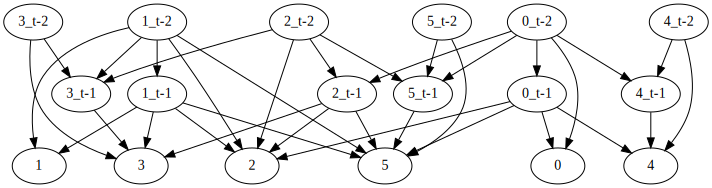

In [75]:
show_dag(updated_dags[0],weight=False)

In [140]:
observations[16]

,0,1,2,3,4,5
0,-0.02660,-0.55195,-0.78765,0.51062,0.24256,0.92540
1,-0.81900,0.92665,0.95981,0.37012,0.68256,0.39340
2,-0.36410,-0.09811,0.30265,-0.05611,0.11396,-0.16547
3,-0.04134,-0.07350,-0.24842,0.05581,0.14239,-0.28989
4,0.03721,-0.08510,-0.02424,-0.02412,0.16825,0.15417
...,...,...,...,...,...,...
146,0.00043,0.00164,0.00115,-0.00175,-0.00123,-0.00233
147,0.00414,0.00398,-0.00450,-0.00299,0.00129,-0.00205
148,0.00191,0.00707,-0.00353,-0.00249,-0.00001,-0.00062
149,0.00202,0.00539,-0.00385,0.00169,-0.00131,0.00009
